### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.


In [13]:
from sklearn.datasets import load_boston

Создайте датафреймы X и y из этих данных.


In [47]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.



In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Масштабируйте данные с помощью StandardScaler.


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочных данных с параметрами:

n_components=2; 

learning_rate=250; 

random_state=42.


In [19]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

Постройте диаграмму рассеяния на этих данных.

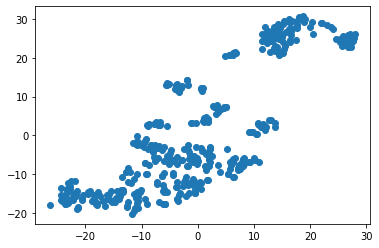

In [21]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])
plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.


In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


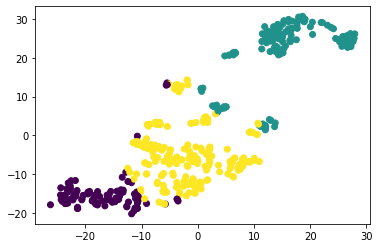

In [83]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = labels_train)
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.


In [85]:
print('First cluster price mean: {}'.format(round(y_train[labels_train == 0].mean(), 2)))
print('Second cluster price mean: {}'.format(round(y_train[labels_train == 1].mean(), 2)))
print('Third cluster price mean: {}'.format(round(y_train[labels_train == 2].mean(), 2)))

First cluster price mean: 27.79
Second cluster price mean: 16.17
Third cluster price mean: 24.96


In [91]:
print('First cluster CRIM mean: {}'.format(round(X_train.loc[labels_train == 0, 'CRIM'].mean(), 2)))
print('Second cluster CRIM mean: {}'.format(round(X_train.loc[labels_train == 1, 'CRIM'].mean(), 2)))
print('Third cluster CRIM mean: {}'.format(round(X_train.loc[labels_train == 2, 'CRIM'].mean(), 2)))

First cluster CRIM mean: 0.07
Second cluster CRIM mean: 10.8
Third cluster CRIM mean: 0.42


Во втором кластере выше криминальность, следовательно ниже цена.

### * Задание 3


Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.


In [94]:
labels_test = kmeans.fit_predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [95]:
print('First cluster price mean: {}'.format(round(y_test[labels_test == 0].mean(), 2)))
print('Second cluster price mean: {}'.format(round(y_test[labels_test == 1].mean(), 2)))
print('Third cluster price mean: {}'.format(round(y_test[labels_test == 2].mean(), 2)))

First cluster price mean: 33.87
Second cluster price mean: 21.55
Third cluster price mean: 16.44


In [97]:
print('First cluster price mean: {}'.format(round(X_test.loc[labels_test == 0, 'CRIM'].mean(), 2)))
print('First cluster price mean: {}'.format(round(X_test.loc[labels_test == 1, 'CRIM'].mean(), 2)))
print('First cluster price mean: {}'.format(round(X_test.loc[labels_test == 2, 'CRIM'].mean(), 2)))

First cluster price mean: 0.09
First cluster price mean: 0.25
First cluster price mean: 10.17
